In [1]:
%load_ext autoreload
%autoreload 2
%autoreload utils

from collections import Counter

import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

from utils import get_ccw_only_df, get_processed_rms
from utils import load_scout_car_areas, load_zips, load_precincts, load_snf
from utils import filter_to_during_analysis, custom_vmax, get_color
from utils import  get_name, get_yoy, compare_pandemic


ccw_df = get_processed_rms()
ccw_only_df = get_ccw_only_df(ccw_df)

In [2]:
scout_car_areas = load_scout_car_areas()
zips = load_zips()
precincts = load_precincts()
snf = load_snf()

/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


3.5951982132886657


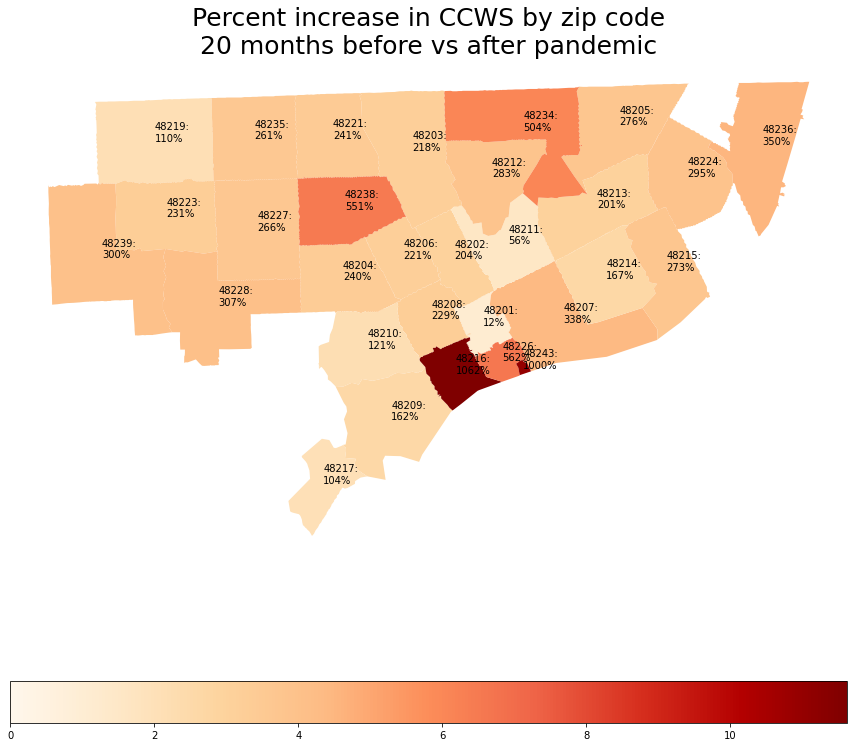

/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


3.5951982132886657


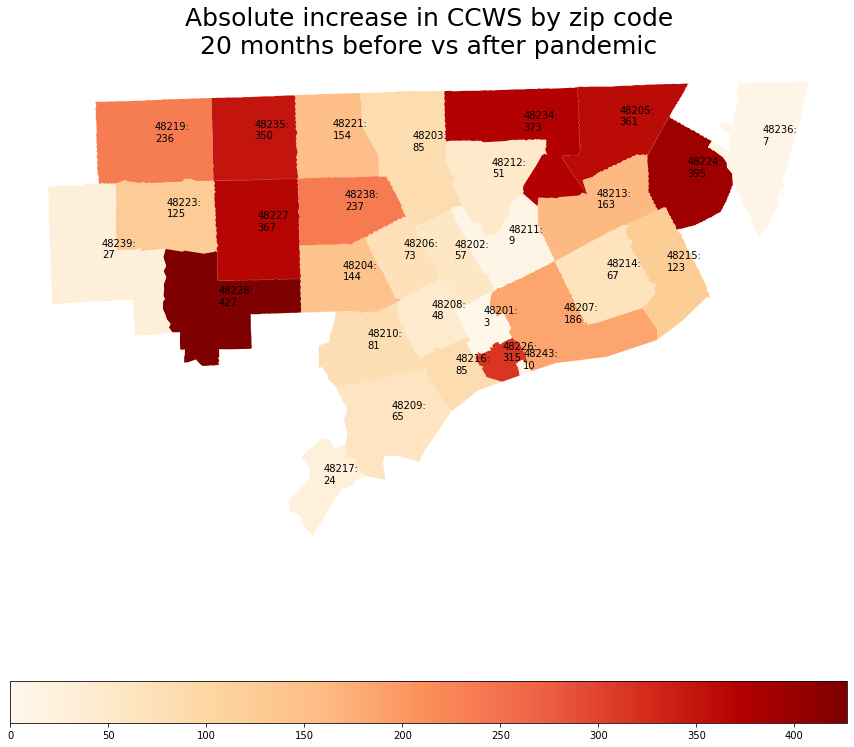

/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


3.5951982132886657


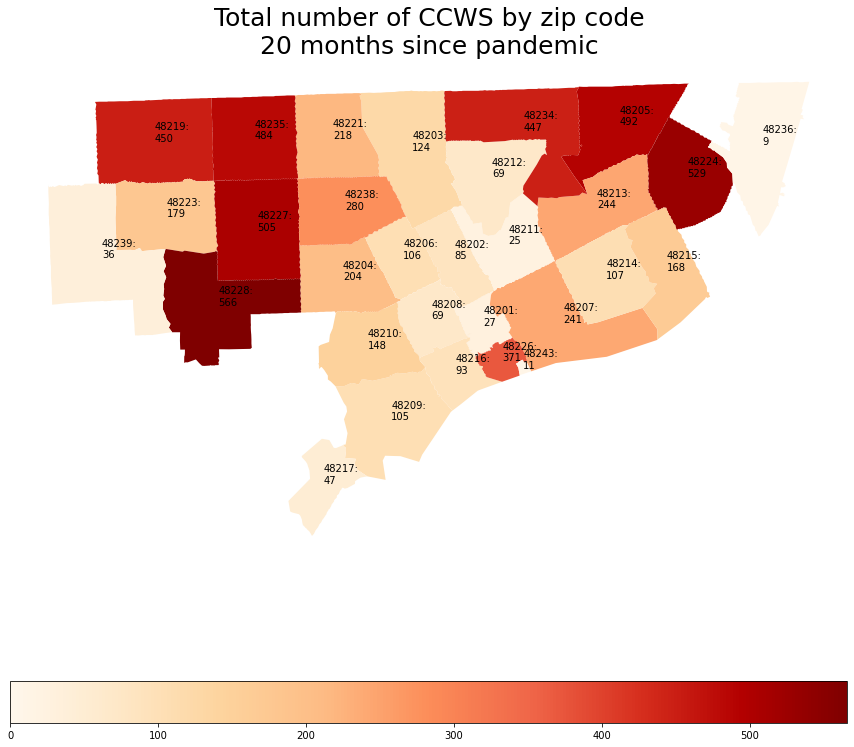

3.5951982132886657


/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


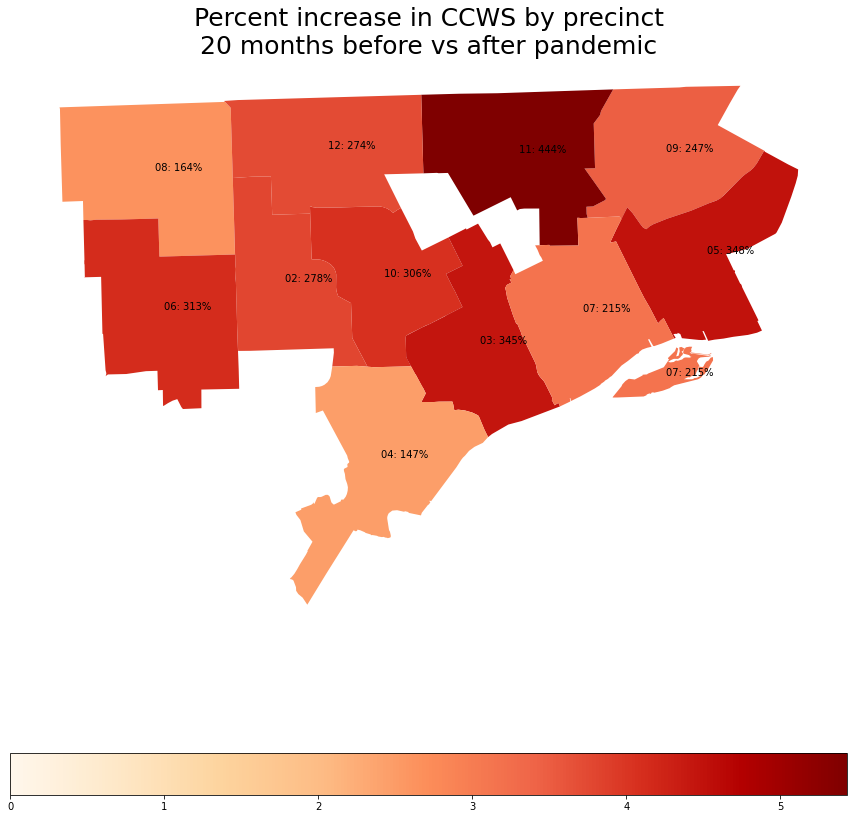

3.5951982132886657


/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


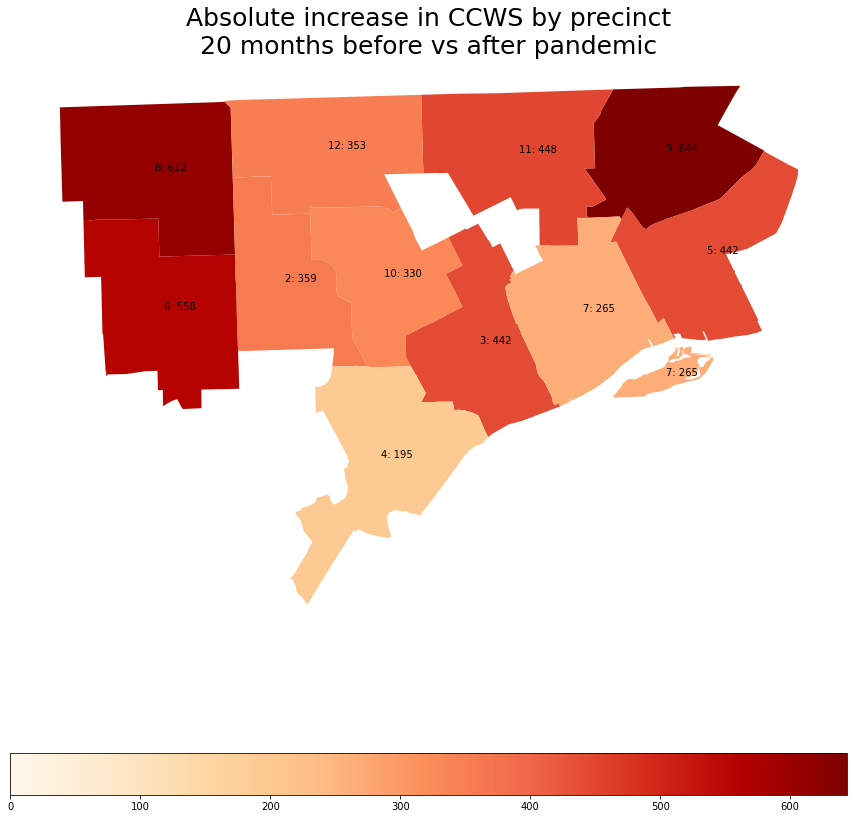

3.5951982132886657


/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


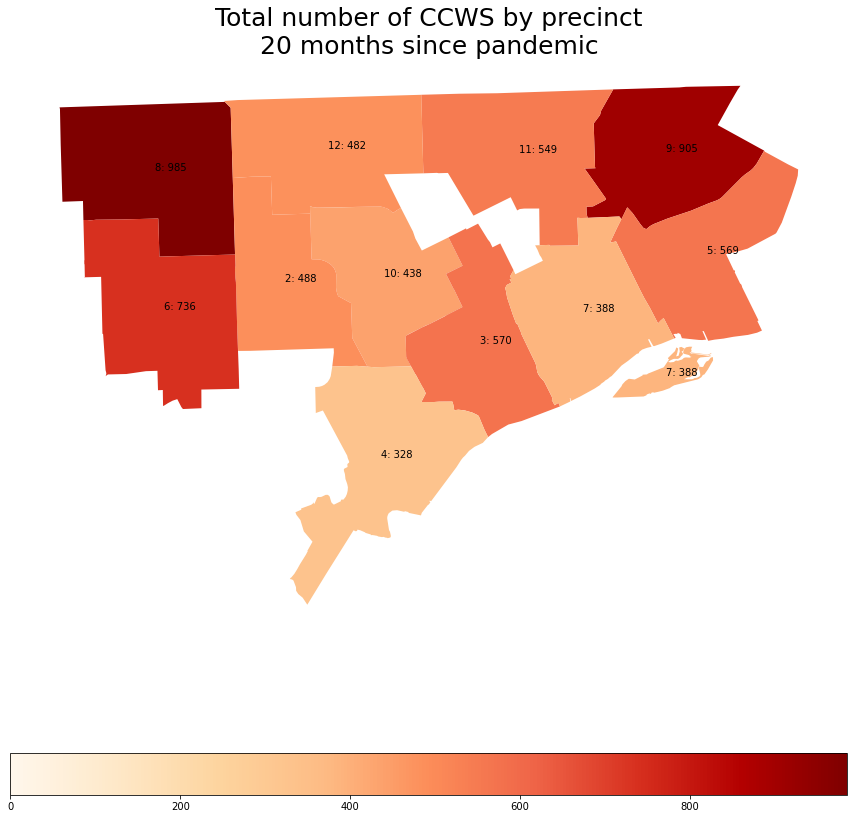

3.5972067039106146


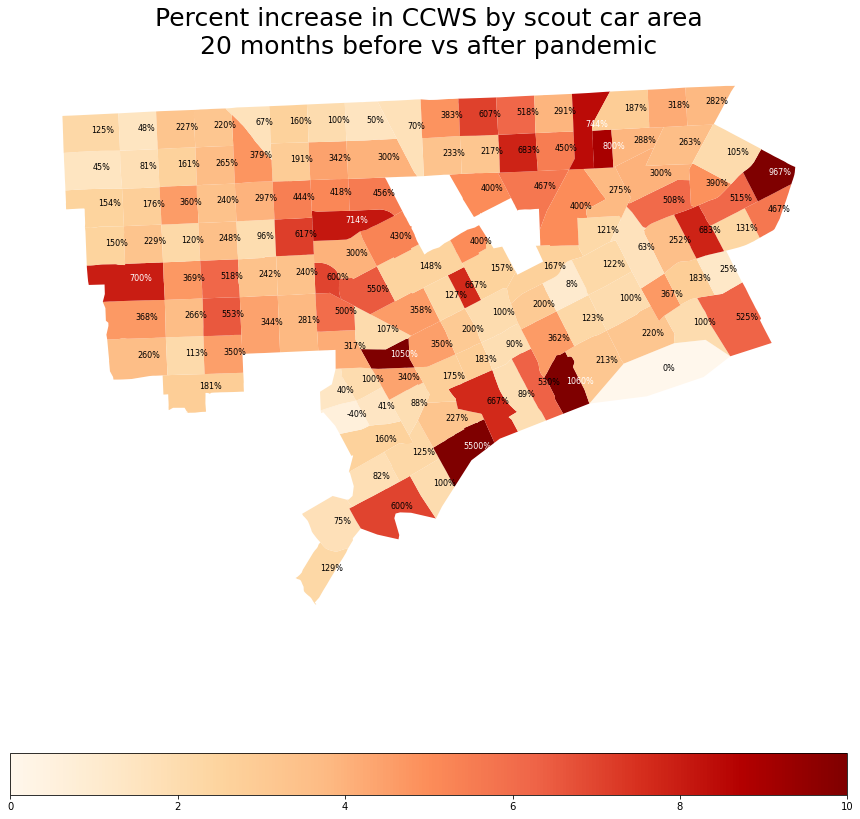

3.5972067039106146


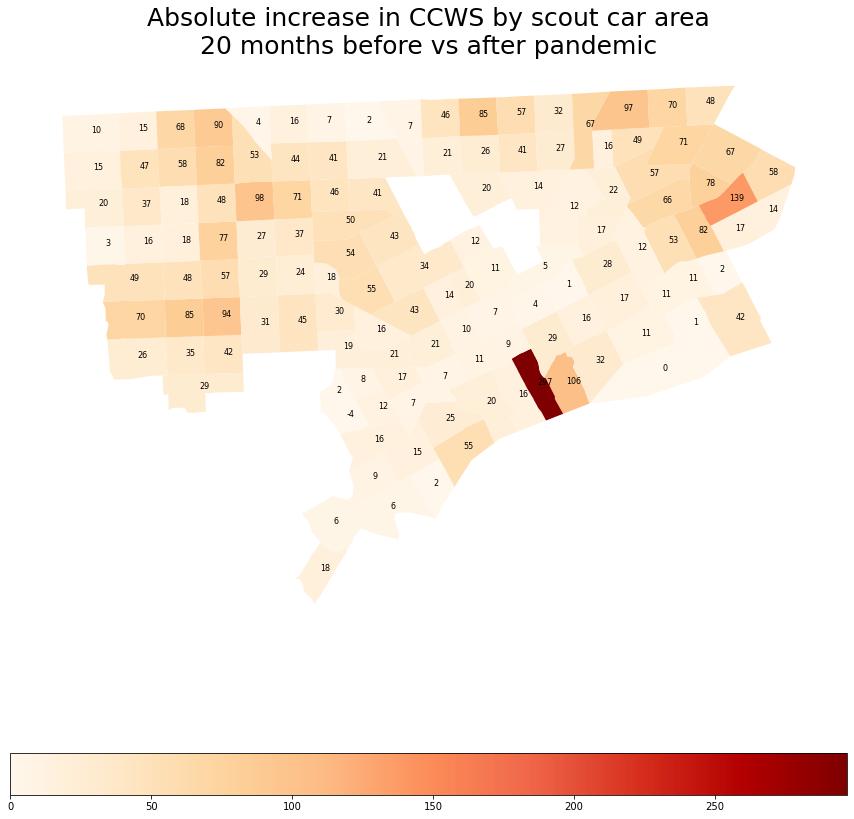

3.5972067039106146


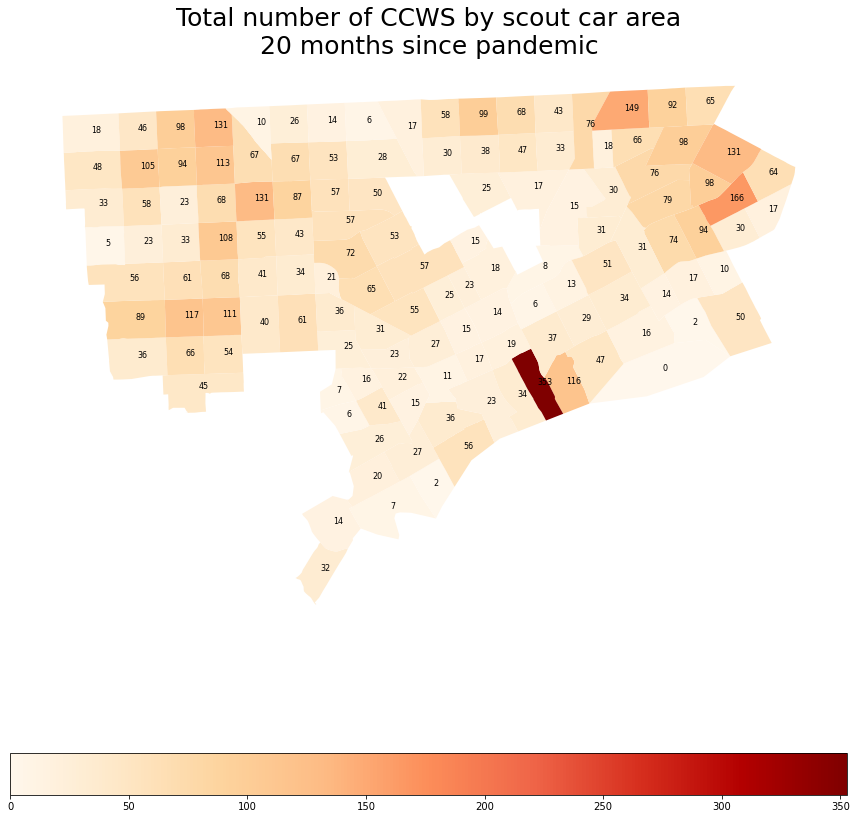

/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


3.5951982132886657


/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


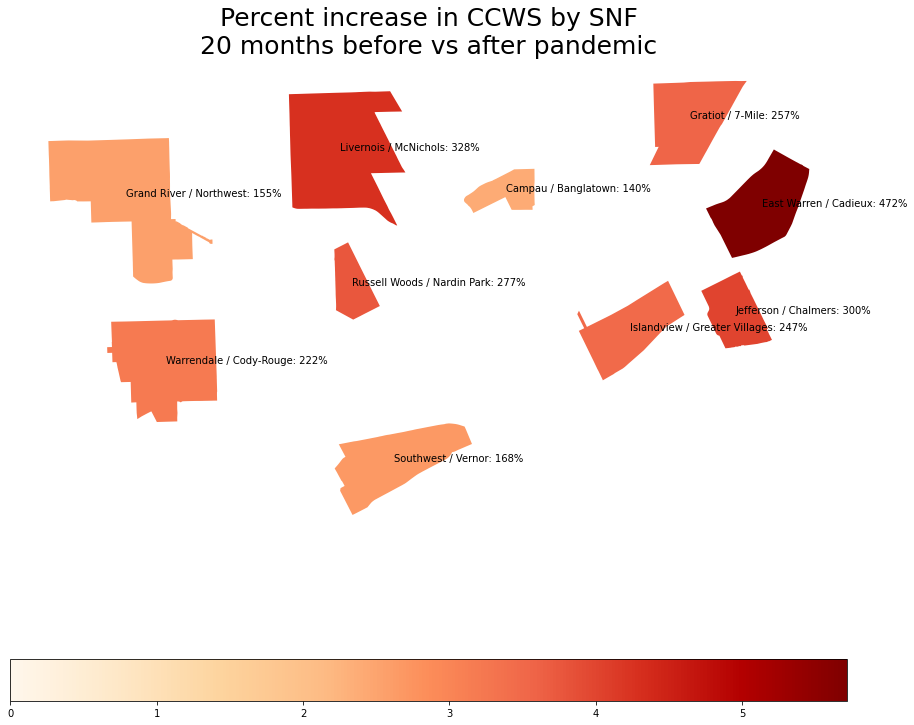

/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


3.5951982132886657


/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


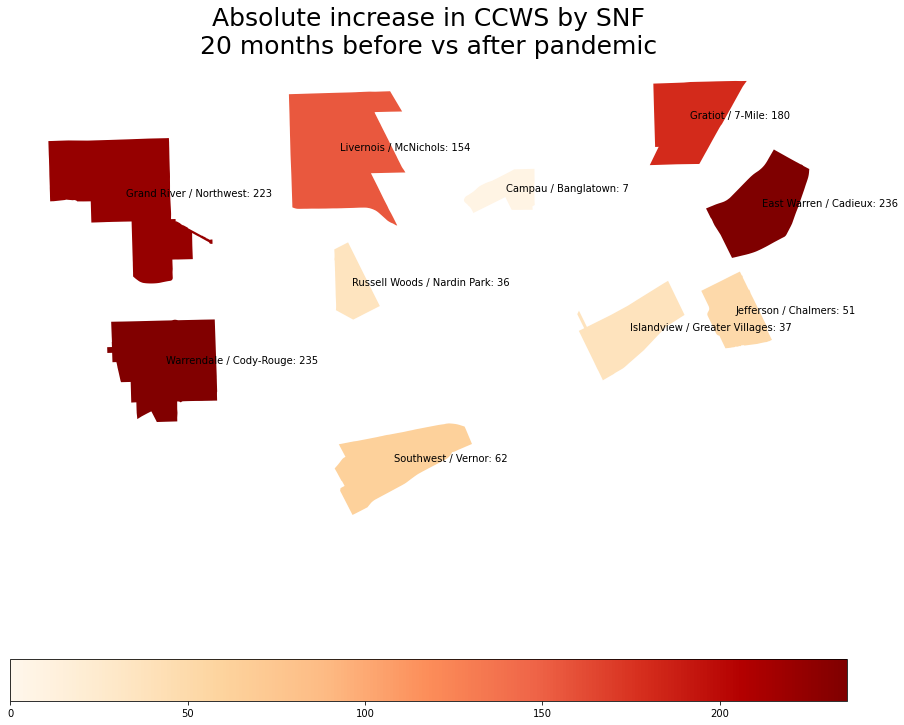

/usr/local/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


3.5951982132886657


/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3612373530.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for index, centroid in enumerate(shapefile.centroid.iteritems()):


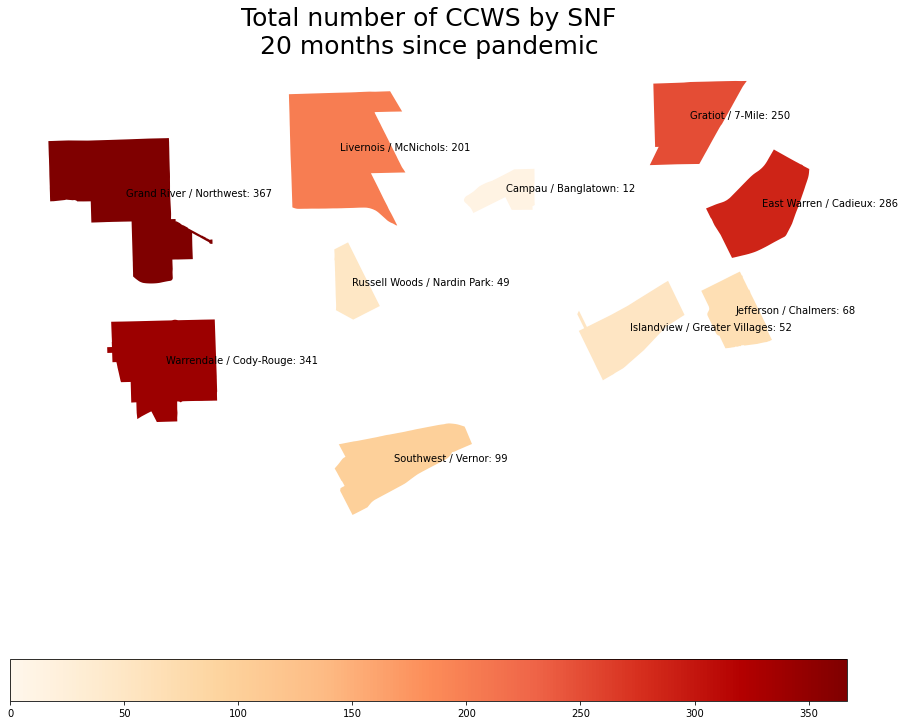

In [3]:
ccw_only_df['scout_car_area'] = ccw_only_df['scout_car_area'].apply(lambda x: str(int(x)) if x.isnumeric() else x)

# these are useless but they are the options
fields = ['zip_code', 'precinct', 'scout_car_area', 'SNF']
analysis_types = ['Percent', 'Absolute', 'Total number of']

num_months = 20
analysis_field = 'scout_car_area'
analysis_type = 'Percent'

for analysis_field in fields:
    for analysis_type in analysis_types:

        df = filter_to_during_analysis(ccw_only_df, num_months=num_months)

        fontsize = 10
        vmax = custom_vmax(analysis_field, analysis_type)

        if analysis_field == 'precinct':
            shapefile = precincts
        if analysis_field == 'zip_code':
            df = df[df.zip_code.notna()]
            df.zip_code = df.zip_code.apply(lambda x:(str(int(x))))
            shapefile = zips

        if analysis_field == 'scout_car_area':
            df = df[df.scout_car_area != 'HPPD']
            shapefile = scout_car_areas
            fontsize = 8

        if analysis_field == 'SNF':
            shapefile = snf
            def snf_for(geometry):
                for sf_row in shapefile.iterrows():
                    sf_row = sf_row[1]
                    if sf_row.geometry.contains(geometry):
                        return sf_row.Proj_NAME
                return 'not snf'
            df['SNF'] = df.geometry.apply(lambda x: snf_for(x))


        ccws = compare_pandemic(df, analysis_field)

        yoy = get_yoy(ccws, analysis_type)


        yoys = [yoy.get(p, 0) for p in shapefile.name]
        shapefile['YOY'] = yoys

        fig, ax = plt.subplots(
             figsize = (15,15)
        )
        if vmax:
            shapefile.plot(ax=ax, column='YOY', legend=True,
                           cmap='OrRd', vmin=0, vmax=vmax,
                          legend_kwds={'orientation': "horizontal"})
        else:
            shapefile.plot(ax=ax, column='YOY', legend=True,
                       cmap='OrRd', vmin=0,
                      legend_kwds={'orientation': "horizontal"})

        # add labels
        for index, centroid in enumerate(shapefile.centroid.iteritems()):
            i, geo = centroid
            pname = shapefile.name.tolist()[i]
            name = get_name(yoy, pname, analysis_field, analysis_type)
            ax.annotate(text=name, xy=[geo.x, geo.y], size=fontsize, 
                        color=get_color(yoy, pname, analysis_field, analysis_type))

        plt.axis('off')

        plt.title(
            "{analysis_type} CCWS by {analysis_field}\n{num_months} months {comparison} pandemic".format(
        **{'analysis_type': analysis_type if analysis_type == 'Total number of' else analysis_type +  ' increase in' ,
            'analysis_field': analysis_field.replace('_', ' '),
           'num_months': num_months,
           'comparison': 'before vs after' if analysis_type != 'Total number of' else 'since'
            }
        ) , fontsize=25)

        print(sum(ccws[True].values())/sum(ccws[False].values()))
        plt.show()

/var/folders/64/c2zkkcsx2ylg6qxz66rh7w0h0000gn/T/ipykernel_1381/3787378644.py:10: RuntimeWarning: divide by zero encountered in log
  logheatmap = np.log(heatmap)


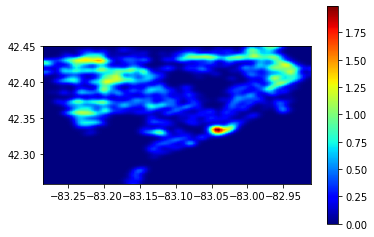

In [4]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]
    def gety(pt):
        return pt.coords[0][1]
    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()
    
heatmap(df, bins=100, smoothing=1.5)